In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
# import cv2
from PIL import Image,ImageOps
# from osgeo import gdal
# from segmentation_models import Unet
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
images   = sorted(os.listdir('/content/drive/MyDrive/Dataset/images'))
DirectoryPath = '/content/drive/MyDrive/Dataset/images'
print(len(images))
img=[]
mask=[]
for filename in images:
    if filename.find('img')!=-1:
        img.append(filename)
    else:
        mask.append(filename)

print(len(img))

print(len(mask))
for i in range(len(img)):
    print(img[i],mask[i])

1888
944
944
16krishna3img_0.PNG 16krishna3_0.PNG
16krishna3img_1.PNG 16krishna3_1.PNG
16krishna3img_10.PNG 16krishna3_10.PNG
16krishna3img_100.PNG 16krishna3_100.PNG
16krishna3img_101.PNG 16krishna3_101.PNG
16krishna3img_102.PNG 16krishna3_102.PNG
16krishna3img_104.PNG 16krishna3_104.PNG
16krishna3img_105.PNG 16krishna3_105.PNG
16krishna3img_106.PNG 16krishna3_106.PNG
16krishna3img_107.PNG 16krishna3_107.PNG
16krishna3img_108.PNG 16krishna3_108.PNG
16krishna3img_109.PNG 16krishna3_109.PNG
16krishna3img_11.PNG 16krishna3_11.PNG
16krishna3img_110.PNG 16krishna3_110.PNG
16krishna3img_111.PNG 16krishna3_111.PNG
16krishna3img_112.PNG 16krishna3_112.PNG
16krishna3img_113.PNG 16krishna3_113.PNG
16krishna3img_114.PNG 16krishna3_114.PNG
16krishna3img_115.PNG 16krishna3_115.PNG
16krishna3img_116.PNG 16krishna3_116.PNG
16krishna3img_117.PNG 16krishna3_117.PNG
16krishna3img_118.PNG 16krishna3_118.PNG
16krishna3img_119.PNG 16krishna3_119.PNG
16krishna3img_12.PNG 16krishna3_12.PNG
16krishna3img_120

In [ ]:
# Variables
# np.set_printoptions(threshold=np.inf)
num_classes = 4
width = 256
height = 256

In [ ]:

X = []
y=[]
t = 0
for filename in img:
    index = img.index(filename)
    path = os.path.join(DirectoryPath,filename)
#     dataset = gdal.Open(path)
#     band1 = dataset.GetRasterBand(1)
#     band2 = dataset.GetRasterBand(2)
#     band3 = dataset.GetRasterBand(3) 
#     b1 = band1.ReadAsArray()
#     b2 = band2.ReadAsArray()
#     b3 = band3.ReadAsArray()
#     single_img = np.dstack((b1, b2, b3))
    single_img = Image.open(path).convert('RGB')
    single_img = np.array( single_img, dtype='uint8' )
    single_img=single_img/256
    testSample_img = single_img
    single_mask_ind = mask[index]
    path = os.path.join(DirectoryPath, single_mask_ind)
    single_mask = Image.open(path).convert('L')
    
    single_mask=np.expand_dims(single_mask,axis=-1)
    single_mask = single_mask/17
    single_mask=single_mask.astype(np.int32)
    testSample_mask = single_mask
    print(single_mask.shape)
    if single_mask.shape==(width,height,1):
        print(single_mask.shape)
        X.append(single_img)
        y.append(single_mask)
print(len(X))
print(len(y))

(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 255, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 255, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 256, 1)
(256, 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train=np.array(X_train)
y_train=np.array(y_train)
X_test=np.array(X_test)
y_test=np.array(y_test)
#print(y_train[0])
print(type(X_train))
print(type(y_train))
print(X_train.shape)
print(y_train.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(599, 256, 256, 3)
(599, 256, 256, 1)


In [ ]:
def conv_block(inputs, filters, pool=True):
    x = Conv2D(filters, 3, padding="same")(inputs)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)

    x = Conv2D(filters, 3, padding="same")(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)

    if pool == True:
        p = MaxPool2D((2, 2))(x)
        return x, p
    else:
        return x

def build_unet(shape, num_classes):
    inputs = Input(shape)

    """ Encoder """
    x1, p1 = conv_block(inputs, 32, pool=True)
    x2, p2 = conv_block(p1, 64, pool=True)
    x3, p3 = conv_block(p2, 128, pool=True)
    x4, p4 = conv_block(p3, 256, pool=True)

    """ Bridge """
    b1 = conv_block(p4, 1024, pool=False)

    """ Decoder """
    u1 = UpSampling2D((2, 2), interpolation="nearest")(b1)
    c1 = Concatenate()([u1, x4])
    x5 = conv_block(c1, 256, pool=False)

    u2 = UpSampling2D((2, 2), interpolation="nearest")(x5)
    c2 = Concatenate()([u2, x3])
    x6 = conv_block(c2, 128, pool=False)

    u3 = UpSampling2D((2, 2), interpolation="nearest")(x6)
    c3 = Concatenate()([u3, x2])
    x7 = conv_block(c3,64, pool=False)

    u4 = UpSampling2D((2, 2), interpolation="nearest")(x7)
    c4 = Concatenate()([u4, x1])
    x8 = conv_block(c4, 32, pool=False)

    """ Output layer """
    output = Conv2D(num_classes, 1, padding="same", activation="softmax")(x8)

    return Model(inputs, output)

if __name__ == "__main__":
    model2 = build_unet((256, 256, 3), 4)
    model2.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 32  896         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 256, 256, 32  128        ['conv2d[0][0]']                 
 alization)                     )                                                             

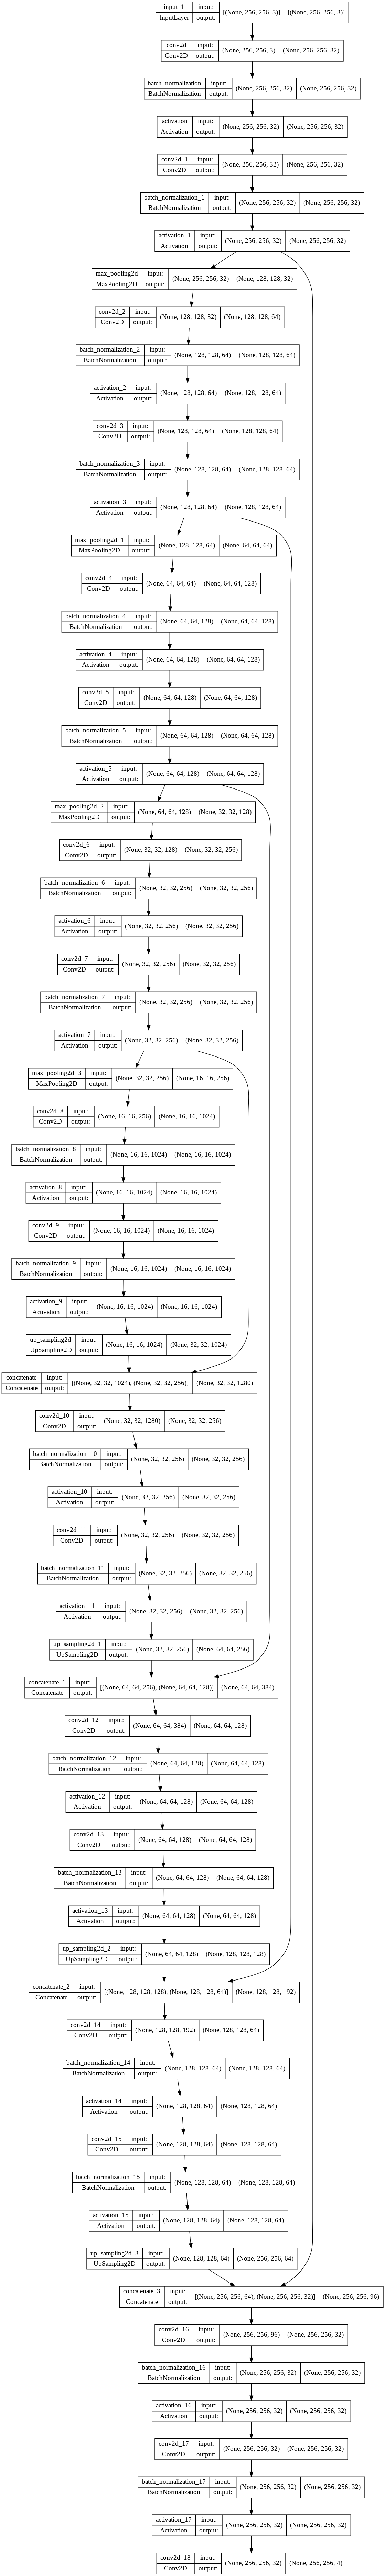

In [ ]:
tf.keras.utils.plot_model(model2, show_shapes=True)

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.00002)

callbacks = [
    tf.keras.callbacks.ModelCheckpoint("oxford_segmentation.h5", save_best_only=True)
]
model2.compile(optimizer=opt,loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])
# model2.compile(optimizer='sgd',loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])


In [ ]:
results = model2.fit(X_train,y_train,epochs=60,validation_data=(X_test,y_test),verbose=1,callbacks=callbacks)

Epoch 1/60
19/19 [==============================] - 74s 3s/step - loss: 1.2899 - accuracy: 0.4841 - val_loss: 1.3378 - val_accuracy: 0.6715
Epoch 2/60
19/19 [==============================] - 34s 2s/step - loss: 0.9998 - accuracy: 0.6744 - val_loss: 1.3008 - val_accuracy: 0.6706
Epoch 3/60
19/19 [==============================] - 34s 2s/step - loss: 0.8803 - accuracy: 0.7438 - val_loss: 1.2492 - val_accuracy: 0.6713
Epoch 4/60
19/19 [==============================] - 34s 2s/step - loss: 0.8302 - accuracy: 0.7703 - val_loss: 1.2050 - val_accuracy: 0.6718
Epoch 5/60
19/19 [==============================] - 34s 2s/step - loss: 0.7729 - accuracy: 0.7929 - val_loss: 1.1628 - val_accuracy: 0.6725
Epoch 6/60
19/19 [==============================] - 34s 2s/step - loss: 0.7352 - accuracy: 0.8108 - val_loss: 1.1123 - val_accuracy: 0.6731
Epoch 7/60
19/19 [==============================] - 34s 2s/step - loss: 0.6883 - accuracy: 0.8233 - val_loss: 1.0809 - val_accuracy: 0.6731
Epoch 8/60
19/19 [==

In [ ]:
model2.save("output.h5")

In [ ]:
df_result = pd.DataFrame(results.history)
df_result

,loss,accuracy,val_loss,val_accuracy
0,1.289949,0.484126,1.337758,0.671478
1,0.999780,0.674382,1.300848,0.670620
2,0.880291,0.743798,1.249229,0.671324
3,0.830157,0.770252,1.205006,0.671802
4,0.772866,0.792851,1.162813,0.672487
5,0.735218,0.810777,1.112322,0.673092
6,0.688266,0.823305,1.080874,0.673120
7,0.656768,0.837279,1.053196,0.673152
8,0.639089,0.837864,1.029885,0.673152
9,0.616248,0.848839,1.011474,0.673153


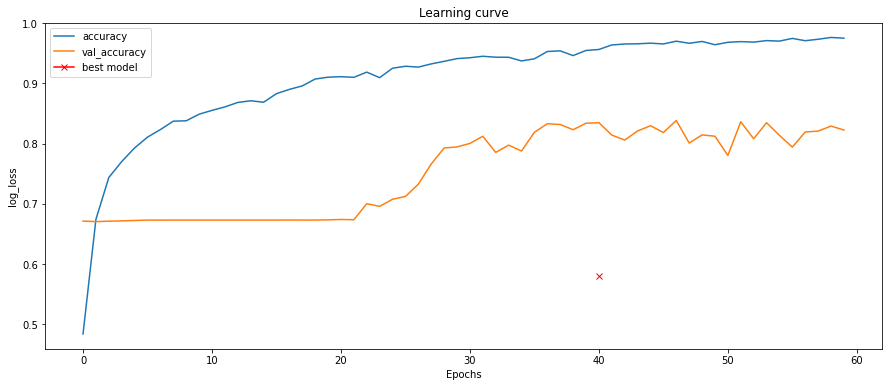

In [ ]:
plt.figure(figsize = (15,6))
plt.title("Learning curve")
# plt.plot(results.history["loss"], label="loss")
# plt.plot(results.history["val_loss"], label="val_loss")
plt.plot(results.history["accuracy"], label="accuracy")
plt.plot(results.history["val_accuracy"], label="val_accuracy")
plt.plot(np.argmin(results.history["val_loss"]), np.min(results.history["val_loss"]), marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("log_loss")
plt.legend();

In [ ]:
loaded_model=load_model("output.h5")
# loaded_model=load_model("oxford_segmentation.h5")

In [ ]:
# Predict on train, val and test
preds_train = loaded_model.predict(X_train, verbose=1)
preds_val = loaded_model.predict(X_test, verbose=1)

9/9 [==============================] - 4s 498ms/step


In [ ]:
print(preds_train.shape)
print(preds_val.shape)

(599, 256, 256, 4)
(258, 256, 256, 4)


In [ ]:
def plot_graph(num):
    preds_val_mat=[]
    for i in range(len(preds_val)):
        if i==num:
            print(i)
            for j in range(256):
                temp_val_mat=[]
                for k in range(256):
                    value = max(preds_val[i][j][k])
                    ans,=np.where(preds_val[i][j][k]==value)
    
                    temp_val_mat.append(ans)
                preds_val_mat.append(temp_val_mat)
            break   
    preds_val_mat = np.array(preds_val_mat)
    preds_val_mat=np.squeeze(preds_val_mat)
    print(preds_val_mat.shape)
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    temp = np.squeeze(y_test[num])
    print(preds_val_mat)
    im = Image.fromarray((preds_val_mat).astype(np.uint8))
    im2 = Image.fromarray((temp).astype(np.uint8))
    ax[0].imshow(im2)
    ax[0].set_title('Original mask')
    ax[1].imshow(im)
    ax[1].set_title('Generated mask')


9
(256, 256)
[[0 3 3 ... 3 3 0]
 [0 0 3 ... 3 3 3]
 [3 0 3 ... 3 3 3]
 ...
 [2 2 2 ... 0 0 0]
 [2 2 2 ... 0 0 0]
 [0 2 2 ... 0 0 0]]


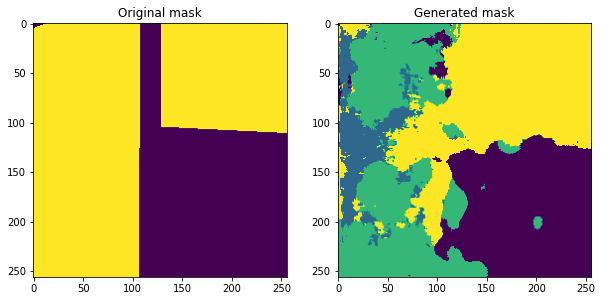

In [ ]:
plot_graph(9)

18
(256, 256)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [2 2 2 ... 0 0 0]]


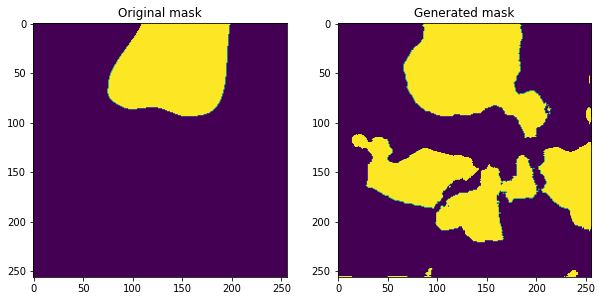

In [ ]:
plot_graph(18)